In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')


In [2]:
car = pd.read_csv(r"C:\Users\faizm\Desktop\Projects\Data\car_price_prediction_.csv")

In [3]:
car

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Audi,2020,2.4,Petrol,Automatic,22650,Like New,61384.10,Q5
2496,2497,Audi,2001,5.7,Hybrid,Manual,77701,Like New,24710.35,A3
2497,2498,Ford,2021,1.1,Hybrid,Manual,272827,Like New,29902.45,Fiesta
2498,2499,Audi,2002,4.5,Diesel,Manual,229164,Like New,46085.67,Q5


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [5]:
car['Price']=car['Price'].astype(int)

In [6]:
car.isnull().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

In [7]:
car['Brand'].unique()


array(['Tesla', 'BMW', 'Audi', 'Ford', 'Honda', 'Mercedes', 'Toyota'],
      dtype=object)

In [8]:
car.describe()

,Car ID,Year,Engine Size,Mileage,Price
count,2500.00000,2500.0000,2500.000000,2500.000000,2500.000000
mean,1250.50000,2011.6268,3.465240,149749.844800,52637.528400
std,721.83216,6.9917,1.432053,87919.952034,27295.832682
min,1.00000,2000.0000,1.000000,15.000000,5011.000000
25%,625.75000,2005.0000,2.200000,71831.500000,28908.000000
50%,1250.50000,2012.0000,3.400000,149085.000000,53484.500000
75%,1875.25000,2018.0000,4.700000,225990.500000,75838.000000
max,2500.00000,2023.0000,6.000000,299967.000000,99982.000000


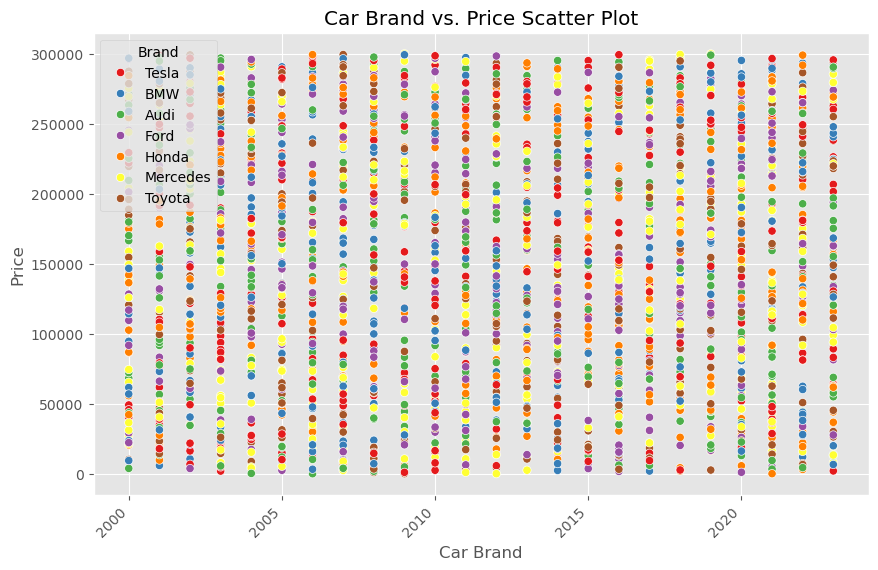

In [9]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Year', y='Mileage', data=car, hue='Brand', palette='Set1')

plt.xticks(rotation=45, ha='right')  
plt.title('Car Brand vs. Price Scatter Plot')  
plt.xlabel('Car Brand')  
plt.ylabel('Price')  

plt.show()

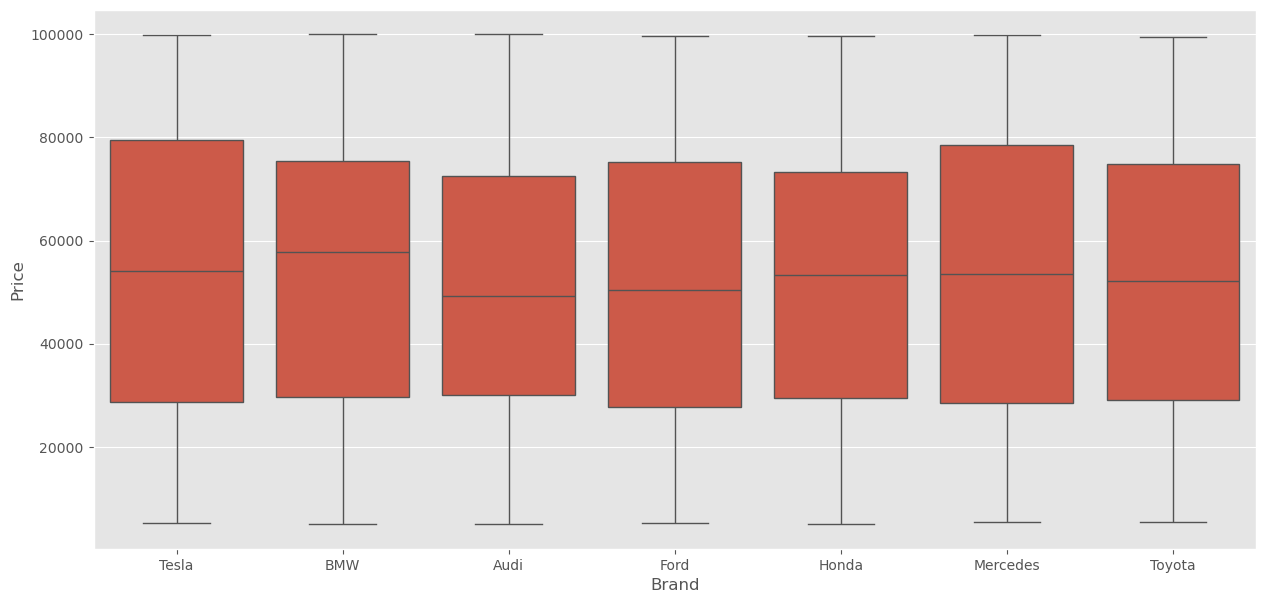

In [10]:
import seaborn as sns
plt.subplots(figsize=(15,7))
sns.boxplot(x='Brand',y='Price',data=car)
plt.show()

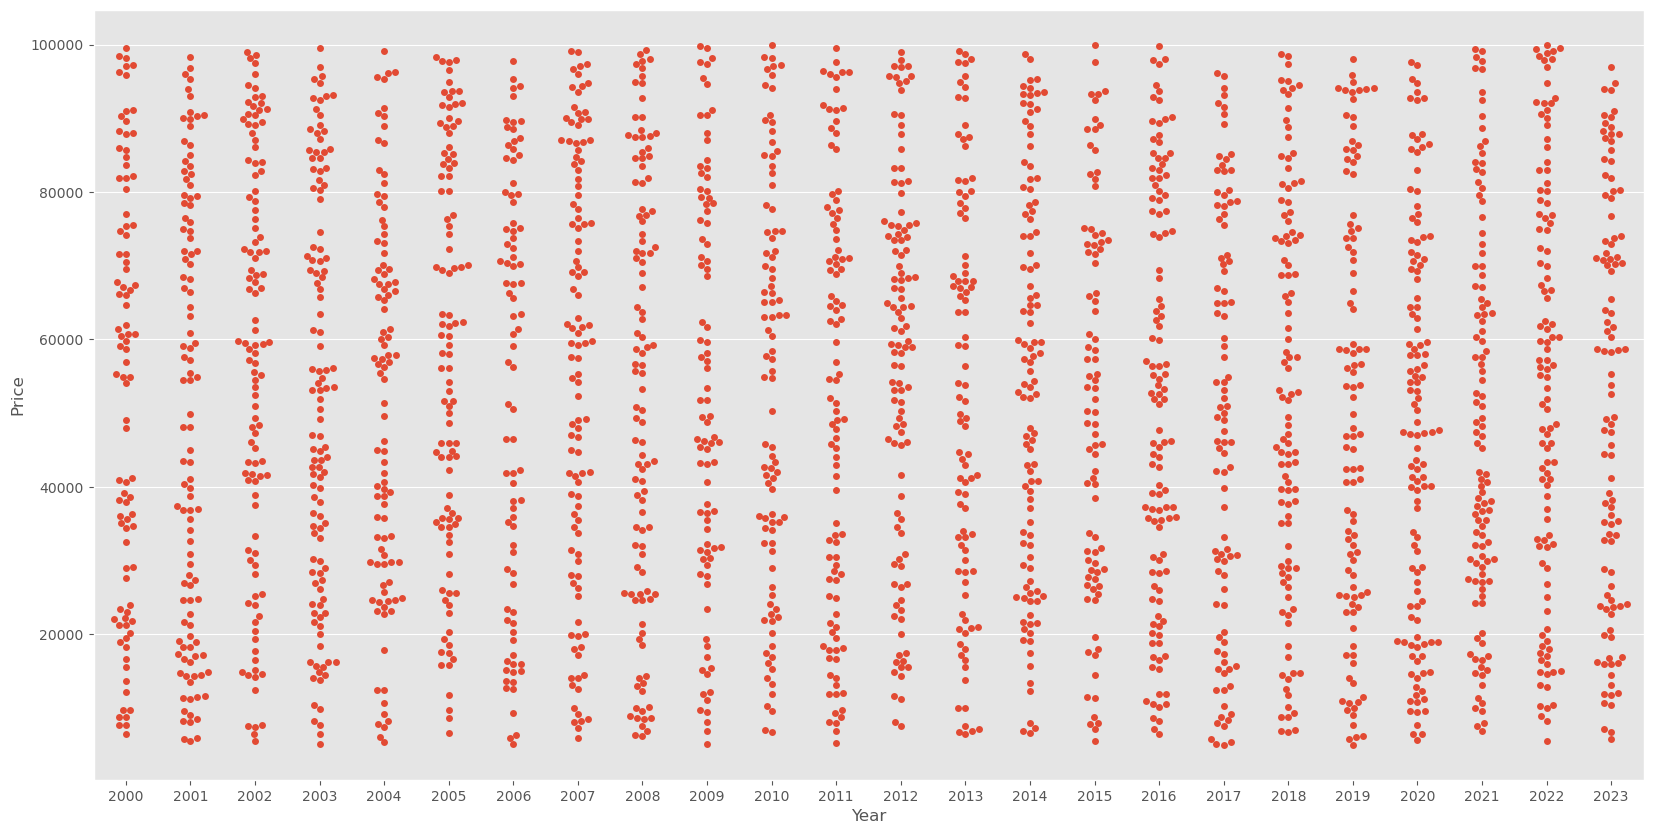

In [11]:
plt.subplots(figsize=(20,10))
sns.swarmplot(x='Year',y='Price',data=car)
plt.show()

In [12]:
###In this Step encoding needs to be done on data which converts object type of data into numerical number which will be useful** 
##for generating the machine learning output as its not going to understand the object type data
### This Numericals also useful to find the corelation between dataset

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
Brand_le = LabelEncoder()

# Fit and transform the 'Brand' column
car['Brand']= Brand_le.fit_transform(car["Brand"])


In [15]:
car

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,5,2016,2.3,Petrol,Manual,114832,New,26613,Model X
1,2,1,2018,4.4,Electric,Manual,143190,Used,14679,5 Series
2,3,0,2013,4.5,Electric,Manual,181601,New,44402,A4
3,4,5,2011,4.1,Diesel,Automatic,68682,New,86374,Model Y
4,5,2,2009,2.6,Diesel,Manual,223009,Like New,73577,Mustang
...,...,...,...,...,...,...,...,...,...,...
2495,2496,0,2020,2.4,Petrol,Automatic,22650,Like New,61384,Q5
2496,2497,0,2001,5.7,Hybrid,Manual,77701,Like New,24710,A3
2497,2498,2,2021,1.1,Hybrid,Manual,272827,Like New,29902,Fiesta
2498,2499,0,2002,4.5,Diesel,Manual,229164,Like New,46085,Q5


In [16]:
car.select_dtypes(include='object').columns

Index(['Fuel Type', 'Transmission', 'Condition', 'Model'], dtype='object')

In [17]:
car['Fuel Type']= Brand_le.fit_transform(car['Fuel Type'])  ## Need to convert one by one else it wont


In [18]:
car['Transmission']= Brand_le.fit_transform(car['Transmission'])

In [19]:
car['Condition']= Brand_le.fit_transform(car['Condition'])

In [20]:
car['Model']= Brand_le.fit_transform(car['Model'])


In [21]:
car

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,5,2016,2.3,3,1,114832,1,26613,19
1,2,1,2018,4.4,1,1,143190,2,14679,1
2,3,0,2013,4.5,1,1,181601,1,44402,3
3,4,5,2011,4.1,0,0,68682,1,86374,20
4,5,2,2009,2.6,0,1,223009,0,73577,21
...,...,...,...,...,...,...,...,...,...,...
2495,2496,0,2020,2.4,3,0,22650,0,61384,23
2496,2497,0,2001,5.7,2,1,77701,0,24710,2
2497,2498,2,2021,1.1,2,1,272827,0,29902,12
2498,2499,0,2002,4.5,0,1,229164,0,46085,23


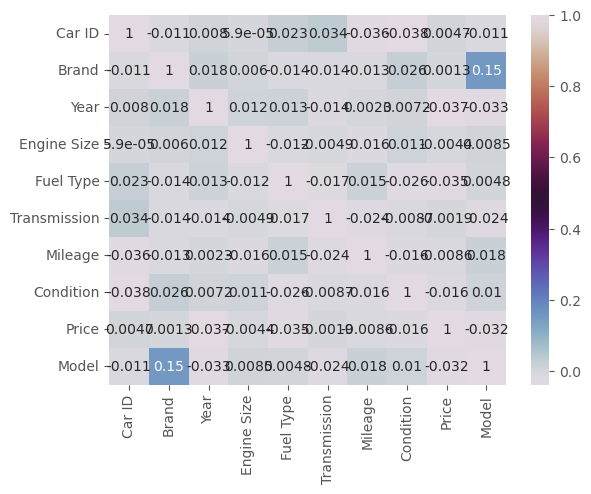

In [22]:
import seaborn as sns                                            ## Corelation using data.coor()
sns.heatmap(car.corr(),annot=True,cmap='twilight')
plt.show() 

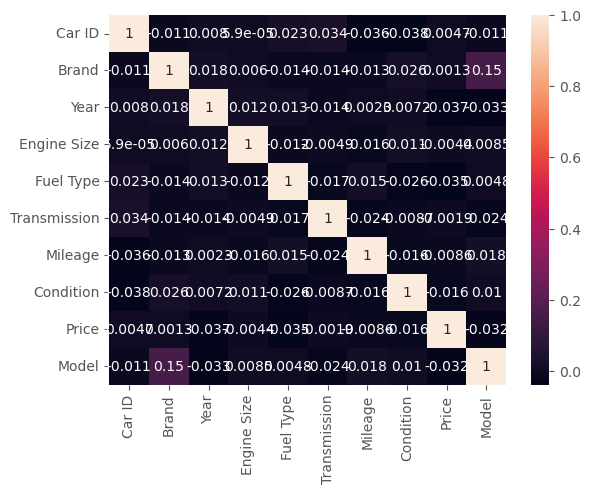

<Figure size 5000x7000 with 0 Axes>

In [23]:
sns.heatmap(car.corr(),annot=True)
plt.figure(figsize=(50,70))  # Set a larger figure size
plt.show()

In [24]:
carco = car.corr() > 0.1

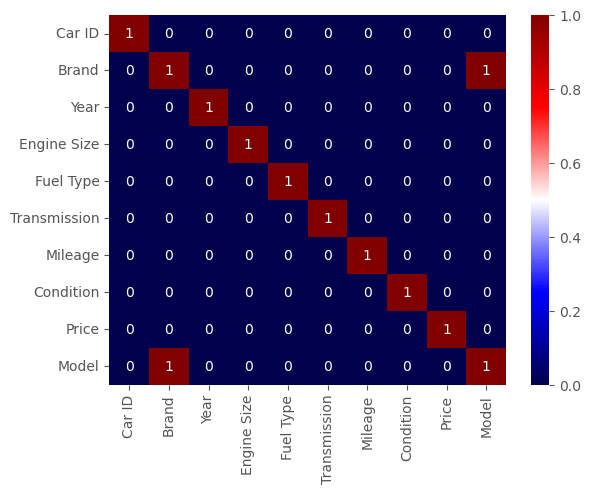

<Figure size 1500x800 with 0 Axes>

In [25]:
sns.heatmap(carco,annot=True,cmap='seismic')
plt.figure(figsize=(15,8))  # Set a larger figure size
plt.show()

In [26]:
carco = car.corr() > 0.02

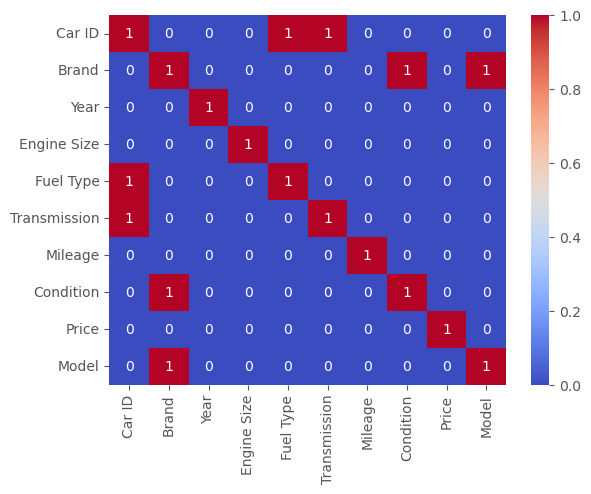

<Figure size 1500x800 with 0 Axes>

In [27]:
sns.heatmap(carco,annot=True,cmap='coolwarm')
plt.figure(figsize=(15,8))  # Set a larger figure size
plt.show()

In [28]:
x = car.drop(columns='Price')

In [29]:
y=car['Price']

In [30]:
x.head(2)

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
0,1,5,2016,2.3,3,1,114832,1,19
1,2,1,2018,4.4,1,1,143190,2,1


In [31]:
y.head(2)

0    26613
1    14679
Name: Price, dtype: int32

In [32]:
##As its a supervised learnig,we need to perform scaling operation for Input data in this case its 'X'
## Then Again convert it into the data frame

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
ss = StandardScaler()  ##First Step
## ss.fit_transform(x) 2nd step
x= pd.DataFrame(ss.fit_transform(x),columns=x.columns)  ###3rd step

In [35]:
x

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
0,-1.731358,0.989259,0.625610,-0.813848,1.342593,0.954628,-0.397234,-0.009241,0.708782
1,-1.729972,-0.990843,0.911720,0.652872,-0.426771,0.954628,-0.074626,1.206712,-1.512177
2,-1.728587,-1.485868,0.196444,0.722716,-0.426771,0.954628,0.362347,-0.009241,-1.265404
3,-1.727201,0.989259,-0.089667,0.443340,-1.311453,-1.047528,-0.922249,-0.009241,0.832169
4,-1.725816,-0.495817,-0.375778,-0.604316,-1.311453,0.954628,0.833415,-1.225194,0.955555
...,...,...,...,...,...,...,...,...,...
2495,1.725816,-1.485868,1.197831,-0.744004,1.342593,-1.047528,-1.445921,-1.225194,1.202328
2496,1.727201,-1.485868,-1.520220,1.560841,0.457911,0.954628,-0.819646,-1.225194,-1.388790
2497,1.728587,-0.495817,1.340886,-1.651973,0.457911,0.954628,1.400157,-1.225194,-0.154924
2498,1.729972,-1.485868,-1.377165,0.722716,-1.311453,0.954628,0.903436,-1.225194,1.202328


In [72]:
from sklearn.model_selection import train_test_split

In [204]:
x_train ,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=53)

In [206]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet  
from sklearn.tree import DecisionTreeRegressor  
from sklearn.svm import SVR  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
###Trying All models to check which fits better

In [208]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)*100,lr.score(x_test,y_test)*100

(2.7792052045999105, -2.876677967249952)

In [210]:
lr1 = Lasso(alpha=2)
lr1.fit(x_train,y_train)
lr1.score(x_train,y_train)*100,lr1.score(x_test,y_test)*100

(2.7792001932521404, -2.8698964070538624)

In [212]:
lr3 = Ridge(alpha=2)
lr3.fit(x_train,y_train)
lr3.score(x_train,y_train)*100,lr3.score(x_test,y_test)*100

(2.7791616117059825, -2.8573803211651816)

In [214]:
lr2 = ElasticNet(alpha=1)
lr2.fit(x_train,y_train)
lr2.score(x_train,y_train)*100,lr1.score(x_test,y_test)*100

(2.474994515723572, -2.8698964070538624)

In [224]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(100.0, -107.36106159611776)

In [236]:
rf = RandomForestRegressor(max_depth=40)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)*100,rf.score(x_test,y_test)*100

(84.7356447526364, -7.858010780783875)

In [250]:
KN = KNeighborsRegressor(n_neighbors=10)
KN.fit(x_train,y_train)
KN.score(x_train,y_train)*100,KN.score(x_test,y_test)*100

(7.292660191058509, -9.238771538072132)

In [284]:
## Random forest test
rf.predict([[-0.922144,0.989259,0.053388,1.141778,-1.311453,-1.047528,-0.486231,1.206712,0.832169]])

C:\Users\faizm\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([51825.06])

In [238]:
x_test

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
584,-0.922144,0.989259,0.053388,1.141778,-1.311453,-1.047528,-0.486231,1.206712,0.832169
1924,0.934615,-0.000792,0.196444,-0.534473,-1.311453,-1.047528,0.205491,-1.225194,-0.031538
2494,1.724430,0.494233,-1.520220,-0.813848,1.342593,0.954628,0.146027,1.206712,-0.401697
2060,1.123062,0.989259,-0.375778,-0.534473,1.342593,0.954628,1.119118,-1.225194,0.708782
1018,-0.320776,-1.485868,0.911720,-1.232910,-1.311453,-1.047528,0.818137,1.206712,-1.388790
...,...,...,...,...,...,...,...,...,...
1950,0.970641,-0.000792,0.482554,0.233809,0.457911,0.954628,0.212089,-1.225194,-0.895244
1883,0.877803,0.494233,-0.947999,-1.512286,1.342593,-1.047528,-0.198628,-0.009241,-0.401697
2297,1.451459,0.989259,1.483942,1.770372,0.457911,-1.047528,1.131598,-0.009241,0.462009
916,-0.462111,-1.485868,0.339499,1.141778,-0.426771,-1.047528,0.619689,1.206712,1.325715


In [244]:
y_test

584     71472
1924    54110
2494    90378
2060    70129
1018    43037
        ...  
1950    53403
1883    84541
2297    38756
916     86181
859     29581
Name: Price, Length: 2000, dtype: int32

In [246]:
dt.predict([[-0.922144,0.989259,0.053388,1.141778,-1.311453,-1.047528,-0.486231,1.206712,0.832169]])

C:\Users\faizm\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([56970.])

In [254]:
KN.predict([[-0.922144,0.989259,0.053388,1.141778,-1.311453,-1.047528,-0.486231,1.206712,0.832169]])

C:\Users\faizm\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([47062.2])

In [271]:
dt = DecisionTreeRegressor(min_samples_split=3,)##,min_samples_leaf=2)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100 ##

(98.02273229901773, -108.56144529502063)

In [290]:
dt.predict([[-0.922144,0.989259,0.053388,1.141778,-1.311453,-1.047528,-0.486231,1.206712,0.832169]])

C:\Users\faizm\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([57664.])

In [310]:
57664*100/71472,40673.5*100/43037

(80.68054622789344, 94.50821386249042)

In [312]:
rf.predict([[-0.922144,0.989259,0.053388,1.141778,-1.311453,-1.047528,-0.486231,1.206712,0.832169]])

C:\Users\faizm\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([51825.06])

In [314]:
lr.predict([[-0.922144,0.989259,0.053388,1.141778,-1.311453,-1.047528,-0.486231,1.206712,0.832169]])

C:\Users\faizm\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([49548.50492062])

In [316]:
lr1.predict([[-0.922144,0.989259,0.053388,1.141778,-1.311453,-1.047528,-0.486231,1.206712,0.832169]])

C:\Users\faizm\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([49549.48461795])

In [318]:
lr2.predict([[-0.922144,0.989259,0.053388,1.141778,-1.311453,-1.047528,-0.486231,1.206712,0.832169]])

C:\Users\faizm\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


array([50066.00318303])

In [320]:
lr3.predict([[-0.922144,0.989259,0.053388,1.141778,-1.311453,-1.047528,-0.486231,1.206712,0.832169]])

C:\Users\faizm\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([49554.56412939])

In [ ]:
## Decision Tree is giving the 80 to 90 percent of prediction price from actual and other are very far away from reality